***Тема курсового проекта: "Спрогнозировать профит в рублях с помощью модели линейной регрессии y_hat = b0 + b1*x1 + b2*x2 + ... bn*xn матричным способом"***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import calendar
%matplotlib inline

In [2]:
df = pd.read_csv('Sales_pred2.csv',',')
df['Профит'] = df['СуммаПродажи'] - df['Себестоимость']
df['ДатаПродажи'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(df['Год'], df['Месяц'], df['День'])])
df.set_index('ДатаПродажи', inplace=True)
df['ДеньНедели'] = df.index.weekday
df['Сезон'] = (df['Месяц']%12 + 3)//3
df.head()

,Год,ТоварКод,ПроизводительКод,Количество,СуммаПродажи,Себестоимость,Месяц,День,Неделя,СегментКод,Профит,ДеньНедели,Сезон
ДатаПродажи,,,,,,,,,,,,,
2017-09-24,2017,305693,3254,2.0,198.00,117.92,9,24,39,33,80.08,6,4
2016-09-14,2016,229615,431,2.0,213.18,167.50,9,14,38,33,45.68,2,4
2016-10-17,2016,117004,326,2.0,95.17,68.20,10,17,43,33,26.97,0,4
2015-04-29,2015,149313,6503,3.0,213.00,142.89,4,29,18,33,70.11,2,2
2017-08-28,2017,210724,4085,1.0,41.00,26.46,8,28,36,2,14.54,0,3


In [3]:
df['ТоварКод'].value_counts().head()

33793    1768
84543    1741
10309    1741
85009    1735
33791    1724
Name: ТоварКод, dtype: int64

* 8048 Арбуз Казахстан 
* 33793 Хлеб белый пшеничный 1с 500г Дан-1

In [4]:
df_filter = df['ТоварКод'].isin(["8048"])
df = df[df_filter]
df.head()

,Год,ТоварКод,ПроизводительКод,Количество,СуммаПродажи,Себестоимость,Месяц,День,Неделя,СегментКод,Профит,ДеньНедели,Сезон
ДатаПродажи,,,,,,,,,,,,,
2015-07-14,2015,8048,4711,-8.190,-401.00,-327.60,7,14,29,17,-73.40,1,3
2014-07-16,2014,8048,4711,6.186,287.16,221.79,7,16,29,17,65.37,2,3
2014-07-30,2014,8048,4711,5.220,242.50,187.62,7,30,31,17,54.88,2,3
2016-08-04,2016,8048,4711,6.895,206.09,297.86,8,4,32,17,-91.77,3,3
2014-07-23,2014,8048,4711,2.038,94.50,73.25,7,23,30,17,21.25,2,3


In [5]:
df_weather = pd.read_csv('weather.csv',',')
df_weather.drop('_id', axis=1, inplace=True)
df_weather.rename(columns={'year': 'Год', 'month': 'Месяц', 'day': 'День', 'temperature': 'Температура'}, inplace=True)
df_weather.head()

,Год,Месяц,День,Температура
0,2014,1,1,-13
1,2014,1,2,-18
2,2014,1,3,-22
3,2014,1,4,-22
4,2014,1,5,-19


In [6]:
df = pd.merge(df, df_weather, on=['Год','Месяц','День'], how='inner')
df.head()

,Год,ТоварКод,ПроизводительКод,Количество,СуммаПродажи,Себестоимость,Месяц,День,Неделя,СегментКод,Профит,ДеньНедели,Сезон,Температура
0,2015,8048,4711,-8.190,-401.00,-327.60,7,14,29,17,-73.40,1,3,13
1,2014,8048,4711,6.186,287.16,221.79,7,16,29,17,65.37,2,3,27
2,2014,8048,4711,5.220,242.50,187.62,7,30,31,17,54.88,2,3,27
3,2016,8048,4711,6.895,206.09,297.86,8,4,32,17,-91.77,3,3,21
4,2014,8048,4711,2.038,94.50,73.25,7,23,30,17,21.25,2,3,26


In [7]:
df['ТоварКод'] = df['ТоварКод'].astype('object')
df['ПроизводительКод'] = df['ПроизводительКод'].astype('object')
df['СегментКод'] = df['СегментКод'].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 14 columns):
Год                 111 non-null int64
ТоварКод            111 non-null object
ПроизводительКод    111 non-null object
Количество          111 non-null float64
СуммаПродажи        111 non-null float64
Себестоимость       111 non-null float64
Месяц               111 non-null int64
День                111 non-null int64
Неделя              111 non-null int64
СегментКод          111 non-null object
Профит              111 non-null float64
ДеньНедели          111 non-null int64
Сезон               111 non-null int64
Температура         111 non-null int64
dtypes: float64(4), int64(7), object(3)
memory usage: 13.0+ KB


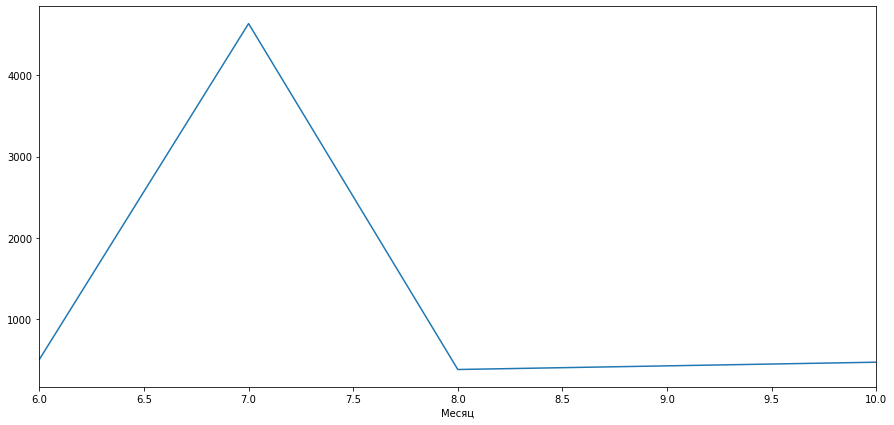

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Месяц']).sum()['Профит'].plot(ax = ax)

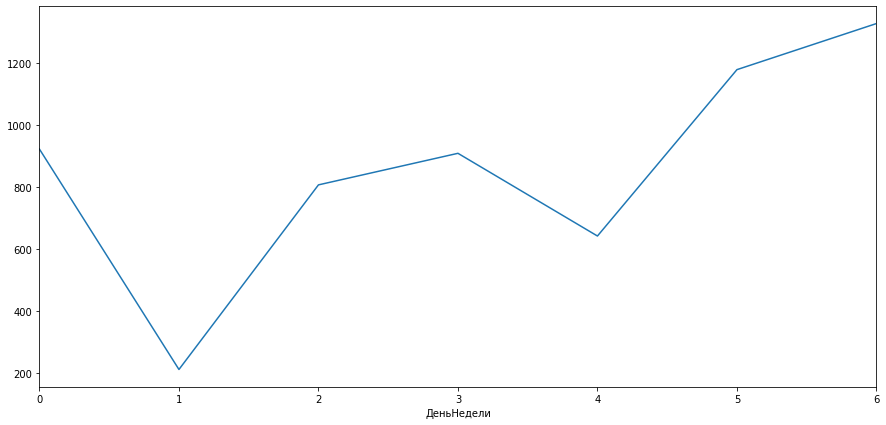

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['ДеньНедели']).sum()['Профит'].plot(ax = ax)

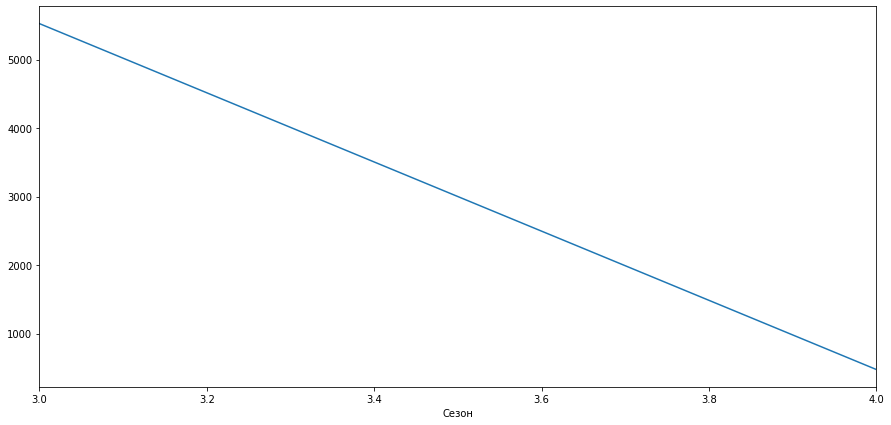

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Сезон']).sum()['Профит'].plot(ax = ax)

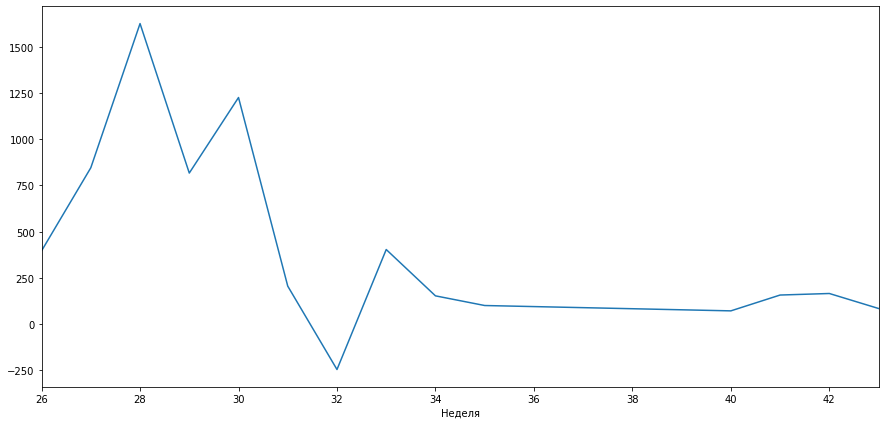

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Неделя']).sum()['Профит'].plot(ax = ax)

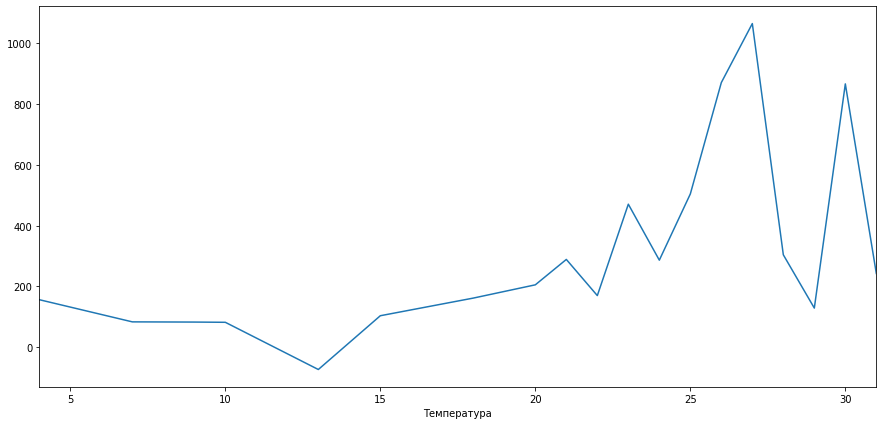

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Температура']).sum()['Профит'].plot(ax = ax)

In [14]:
df = df.select_dtypes(include = ['float64', 'int64'])
df.head()

,Год,Количество,СуммаПродажи,Себестоимость,Месяц,День,Неделя,Профит,ДеньНедели,Сезон,Температура
0,2015,-8.190,-401.00,-327.60,7,14,29,-73.40,1,3,13
1,2014,6.186,287.16,221.79,7,16,29,65.37,2,3,27
2,2014,5.220,242.50,187.62,7,30,31,54.88,2,3,27
3,2016,6.895,206.09,297.86,8,4,32,-91.77,3,3,21
4,2014,2.038,94.50,73.25,7,23,30,21.25,2,3,26


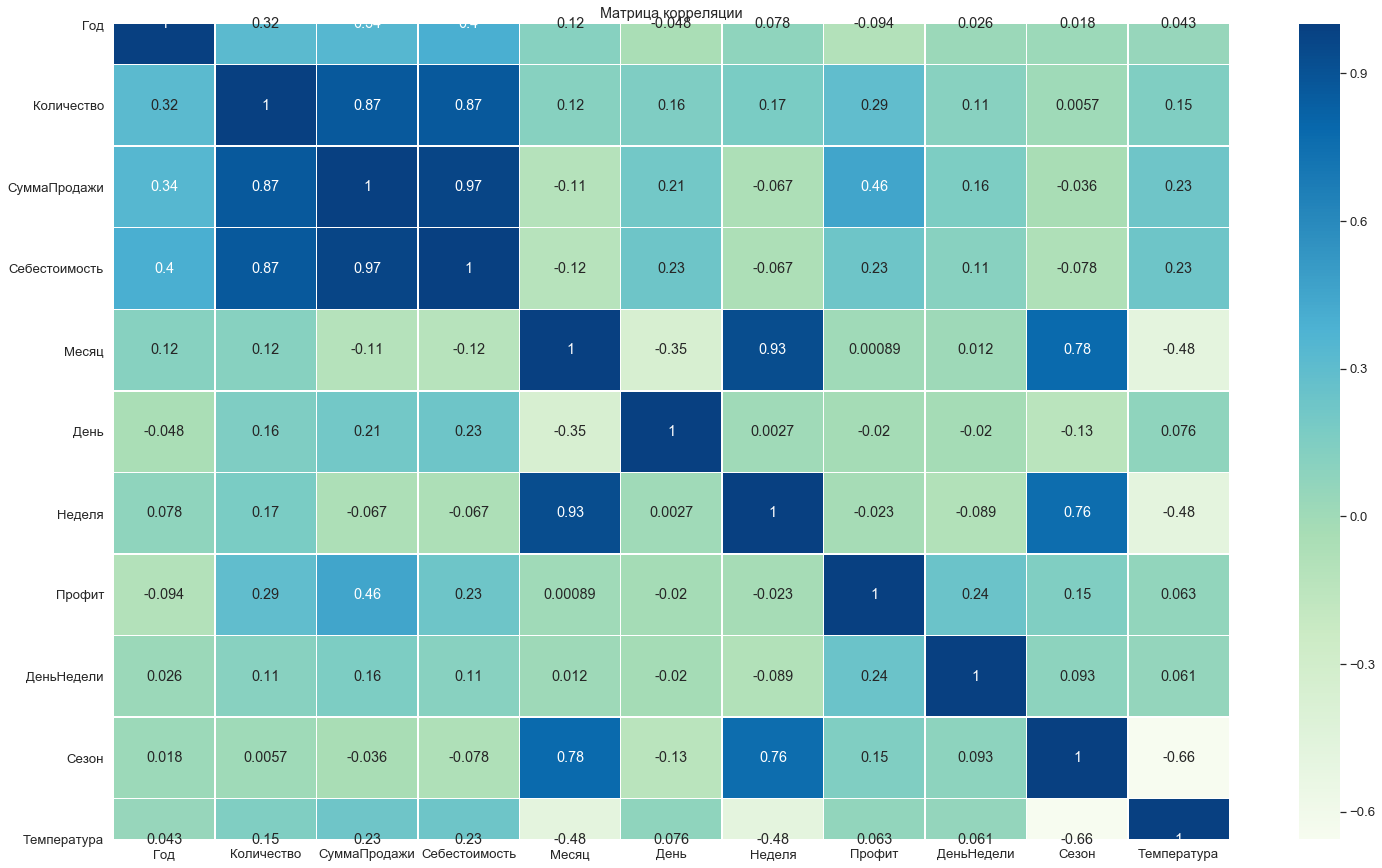

In [15]:
plt.figure(figsize = (25,15))

sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Матрица корреляции')
plt.show()

In [16]:
y = df['Профит'].values
y

array([ -73.4 ,   65.37,   54.88,  -91.77,   21.25,   99.34,   72.81,
         31.46,   64.84,   47.14,    2.52,  174.11,  125.85,   81.96,
         33.66,   12.61,  -16.32,   22.8 ,  126.31,    3.18,   63.8 ,
         27.55,  138.42,   36.01,   12.86,  122.25,   42.56,   65.31,
        141.91,   42.78,   49.83,   15.9 ,   40.47,   30.65,  105.06,
         30.59,   38.71,   79.64,   52.9 ,   68.36,   45.88,   90.21,
         38.67,    5.18,   68.09,  156.35,   34.25,   43.63,  -21.9 ,
        120.12,   83.4 ,  138.47,   40.88,   70.58,   33.92,   15.51,
         19.6 ,  100.57,  121.56,   18.1 ,   73.06,   30.56,    5.29,
        108.72, -198.91,   60.13,   64.08,   96.87,   22.9 ,   26.67,
         18.52,   -0.3 ,   20.06,   41.53,   51.93,   13.91,   93.55,
        211.9 ,   43.49,  163.8 ,  176.  ,   58.42,   -0.51,   83.25,
         64.71,   84.7 ,    6.69, -112.79,   32.3 ,  166.55,   90.12,
         -4.02,   -0.69,  120.55,  -60.15,  100.14,   46.73,   16.22,
         73.4 ,   40

In [17]:
y = y.reshape(df.shape[0], 1)
y

array([[ -73.4 ],
       [  65.37],
       [  54.88],
       [ -91.77],
       [  21.25],
       [  99.34],
       [  72.81],
       [  31.46],
       [  64.84],
       [  47.14],
       [   2.52],
       [ 174.11],
       [ 125.85],
       [  81.96],
       [  33.66],
       [  12.61],
       [ -16.32],
       [  22.8 ],
       [ 126.31],
       [   3.18],
       [  63.8 ],
       [  27.55],
       [ 138.42],
       [  36.01],
       [  12.86],
       [ 122.25],
       [  42.56],
       [  65.31],
       [ 141.91],
       [  42.78],
       [  49.83],
       [  15.9 ],
       [  40.47],
       [  30.65],
       [ 105.06],
       [  30.59],
       [  38.71],
       [  79.64],
       [  52.9 ],
       [  68.36],
       [  45.88],
       [  90.21],
       [  38.67],
       [   5.18],
       [  68.09],
       [ 156.35],
       [  34.25],
       [  43.63],
       [ -21.9 ],
       [ 120.12],
       [  83.4 ],
       [ 138.47],
       [  40.88],
       [  70.58],
       [  33.92],
       [  

In [18]:
X = df.loc[:,['СуммаПродажи', 'ДеньНедели', 'Сезон']].values
X

array([[-4.01000e+02,  1.00000e+00,  3.00000e+00],
       [ 2.87160e+02,  2.00000e+00,  3.00000e+00],
       [ 2.42500e+02,  2.00000e+00,  3.00000e+00],
       [ 2.06090e+02,  3.00000e+00,  3.00000e+00],
       [ 9.45000e+01,  2.00000e+00,  3.00000e+00],
       [ 5.49510e+02,  6.00000e+00,  3.00000e+00],
       [ 3.43690e+02,  5.00000e+00,  3.00000e+00],
       [ 1.19200e+02,  1.00000e+00,  3.00000e+00],
       [ 2.94940e+02,  3.00000e+00,  3.00000e+00],
       [ 5.41590e+02,  4.00000e+00,  3.00000e+00],
       [ 3.31000e+02,  2.00000e+00,  3.00000e+00],
       [ 7.77660e+02,  4.00000e+00,  3.00000e+00],
       [ 5.79000e+02,  6.00000e+00,  3.00000e+00],
       [ 3.09420e+02,  4.00000e+00,  4.00000e+00],
       [ 1.27510e+02,  3.00000e+00,  3.00000e+00],
       [ 5.60300e+01,  4.00000e+00,  3.00000e+00],
       [ 2.45000e+02,  0.00000e+00,  3.00000e+00],
       [ 1.01520e+02,  6.00000e+00,  3.00000e+00],
       [ 1.26423e+03,  6.00000e+00,  3.00000e+00],
       [ 3.36060e+02,  6.00000e

In [19]:
X = np.hstack([np.ones((df.shape[0], 1)), X])
X

array([[ 1.00000e+00, -4.01000e+02,  1.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  2.87160e+02,  2.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  2.42500e+02,  2.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  2.06090e+02,  3.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  9.45000e+01,  2.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  5.49510e+02,  6.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  3.43690e+02,  5.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  1.19200e+02,  1.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  2.94940e+02,  3.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  5.41590e+02,  4.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  3.31000e+02,  2.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  7.77660e+02,  4.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  5.79000e+02,  6.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  3.09420e+02,  4.00000e+00,  4.00000e+00],
       [ 1.00000e+00,  1.27510e+02,  3.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  5.

In [20]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[-1.27784739e+02],
       [ 1.05177557e-01],
       [ 4.88417760e+00],
       [ 4.30933817e+01]])

In [21]:
df2 = pd.DataFrame(data=y, columns=['y'])
df2['y_hat'] = np.dot(X, B)
df2['error'] = df2['y_hat'] - df2['y']
df2.head(20)

,y,y_hat,error
0,-73.40,-35.796616,37.603384
1,65.37,41.466549,-23.903451
2,54.88,36.769319,-18.110681
3,-91.77,37.823982,129.593982
4,21.25,21.203041,-0.046959
5,99.34,88.596591,-10.743409
6,72.81,62.064769,-10.745231
7,31.46,18.916749,-12.543251
8,64.84,47.169008,-17.670992
9,47.14,77.995230,30.855230
